<a href="https://colab.research.google.com/github/elemi10/7506-TP-Org-de-datos/blob/master/RandomForest_(practica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[![AnalyticsDojo](https://github.com/rpi-techfundamentals/spring2019-materials/blob/master/fig/final-logo.png?raw=1)](http://rpi.analyticsdojo.com)
<center><h1>Practica Random Forest</h1></center>
<center><h3><a href = 'http://rpi.analyticsdojo.com'>rpi.analyticsdojo.com</a></h3></center>





[link al video ](https://www.youtube.com/watch?v=kEmCq_OZo5k&list=PLeo_qKwGPZYeJQb-M1nE_cnj43uOKZtf2&index=6&t=0s)

In [1]:
# link youtube
# https://www.youtube.com/watch?v=kEmCq_OZo5k&list=PLeo_qKwGPZYeJQb-M1nE_cnj43uOKZtf2&index=6&t-=0s

In [2]:
# importo las librerias
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
# cargo el set de datos de pruebas "Boston"
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))
print(boston)

Type of boston dataset: <class 'sklearn.utils.Bunch'>
{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25

## boston es un diccionario

Boston en un **diccionario**

In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## cantidad de filas y columnas


In [5]:
# analizamos un poco los datos
boston.data.shape

(506, 13)

## nombre de los features

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## descripcion del dataset

In [7]:
print(boston.DESCR)
# ESTE SET NO TIENE DATOS NULOS/VALORES FALTANTES

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## convertimos el set de datos en un Dataframe

In [8]:
import pandas as pd

data = pd.DataFrame(boston.data)
#convierto las columnas en lo features
data.columns=boston.feature_names

## primeras 5 registros

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## agregamos el target al dataframe

In [10]:
data['PRICE']=boston.target

In [11]:
# vemos info del df
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
# vemos informacion estadistica de las features
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## separamos la variable a **predecir**

In [13]:
# separamos las variables, dejamos en X los atributos y en y la variable a predecir (price)
X,y=data.iloc[:,:-1],data.iloc[:,-1]

## creamos el set de entrenamiento y de test

---



In [14]:
# importamos la funcion train_test_split que permite separar un set que tengamos (en este caso en X donde tenemos los datos)
# separamos X en X_train y en X_test; mientras que a y lo separamos en y_train e y_test
from sklearn.model_selection import train_test_split

In [15]:
# en y_train e y_test van a estar los valores de TARGET para predecir
X_train, X_test, y_train, y_test =\
  train_test_split(X,y,test_size=0.2, random_state=123)
# seteamos random_state para que cada vez que lo corramos tengamos la misma division (?)

## aplicamos Random Forest

### Hiperparametros



*   **n_estimators** cant de arboles a construir (100 por default)
*   **max_depth** maxima profundidad de cada arbol
*   **min_samples_split** la cant minima de datos reqwueridos para splitear un nodo interno (2)
*   **min_samples_leaf** cant minima de datos requeridos para ser una hoja (1)
*   **max_features** la cant de features a considerar cuando se busca el mejor split (n)







## Entrenando y prediciendo con hiperparametros por defecto

In [16]:
rf_model =RandomForestRegressor(random_state=1) # seteamos random_state en 1 para que tengamos siempre los mismos valores
rf_model.fit(X_train, y_train) # con fit lo entrenamos y le pasamos el set de train
preds = rf_model.predict(X_test) # una vez que el modelo rf_model se entreno, le pasamos el X_test
rmse = np.sqrt(mean_squared_error(y_test,preds)) # calculamos el error medio cuadratico de numpy (aunque podemos usar otro) \
# y le pasamos el target real del conjunto de test y las predicciones que nos arrojo el modelo de rf_model 
print("RMSE: %f" % (rmse)) # imprimimos el RMSE

RMSE: 4.130455


In [34]:
# Imprimo las predicciones
print(preds)

[20.69310345 27.55       46.259375   21.37647059 33.89375    46.259375
 23.94516129  9.736      18.98888889 35.46521739 23.94516129 20.69310345
 15.42272727 23.94516129 18.98888889 19.51428571 19.51428571 46.259375
 18.98888889 15.42272727 16.90625    20.69310345 33.89375    46.259375
 33.89375    23.73636364 13.84375    20.69310345 14.96666667 23.73636364
 27.55       33.89375    13.84375    20.69310345 22.05454545 35.46521739
 23.94516129 13.84375    15.42272727 46.259375   23.75555556 18.98888889
 21.37647059 46.259375   18.98888889 14.96666667 20.69310345 23.73636364
 18.98888889 35.46521739 33.89375    29.66666667 20.69310345  9.736
 21.37647059 16.90625    13.74        9.736      35.46521739  9.736
 19.51428571 14.96666667 16.90625    21.37647059 21.63333333 23.94516129
 23.94516129 21.37647059 23.94516129 33.89375    19.51428571 25.13333333
 18.98888889 23.75555556 16.90625    15.42272727 13.33333333 18.98888889
 33.89375    13.33333333 35.46521739  9.736      23.94516129 18.988

In [37]:
type(preds)

numpy.ndarray

In [39]:
# transformo preds (array) en df
preds_data = pd.DataFrame(preds)

In [41]:
# imprimo los primeros 5 registros de preds_data
preds_data.head()

,0
0,20.693103
1,27.550000
2,46.259375
3,21.376471
4,33.893750


## importancia de las features

In [17]:
# Gini importance
# con le modelo ya entrenado, llamamos a feature_importances_ para ver el 'peso' que tene cada una
rf_model.feature_importances_

array([2.98879920e-02, 1.28498143e-03, 4.99298576e-03, 4.41006218e-04,
       2.11962049e-02, 5.26398187e-01, 1.27656712e-02, 5.32214654e-02,
       4.94492864e-03, 1.55572336e-02, 1.28296243e-02, 9.24296912e-03,
       3.07236751e-01])

<function matplotlib.pyplot.show>

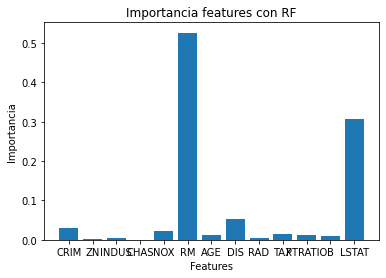

In [18]:
# hacemos un calculo para ver el peso de cada uno de los atributos
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia features con RF')
plt.show


In [19]:
# los dos atributos mas importantes para este modelo RF son RM (promedio de habitaciones) y LSTAT (% de poblacion de bajos recursos)

## entrenando y prediciendo con solo 5 arboles

In [20]:
rf_model =RandomForestRegressor(random_state=1, n_estimators=5) # seteamos random_state en 1 para que tengamos siempre los mismos valores

rf_model.fit(X_train, y_train) # con fit lo entrenamos y le pasamos el set de train
preds = rf_model.predict(X_test) # una vez que el modelo rf_model se entreno, le pasamos el X_test

rmse = np.sqrt(mean_squared_error(y_test,preds)) # calculamos el error medio cuadratico de numpy (aunque podemos usar otro) \
# y le pasamos el target real del conjunto de test y las predicciones que nos arrojo el modelo de rf_model 
print("RMSE: %f" % (rmse)) # imprimimos el RMSE

# usando solo 5 arboles tenemos un poco menos de error cuadratico que utilizando k=100

RMSE: 3.898585


## entrenando y prediciendo con solo 5 arboles y max_features igual a 10

In [21]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5, max_features=10)
# indicamos el max_feature en 10 en lugar de tener en cuenta 13

rf_model.fit(X_train, y_train) # con fit lo entrenamos y le pasamos el set de train
preds = rf_model.predict(X_test) # una vez que el modelo rf_model se entreno, le pasamos el X_test

rmse = np.sqrt(mean_squared_error(y_test,preds)) # calculamos el error medio cuadratico de numpy (aunque podemos usar otro) \
# y le pasamos el target real del conjunto de test y las predicciones que nos arrojo el modelo de rf_model 
print("RMSE: %f" % (rmse)) # imprimimos el RMSE

RMSE: 3.845825


## entrenando y prediciendo con solo 5 arboles y maxima profundidad de 2

In [22]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5, max_depth=2)
# indicamos una profundidad maxima de 2 (creamos un arbol que es mas simple - ya que el valor por defecto de max_depth no tiene limites)

rf_model.fit(X_train, y_train) # con fit lo entrenamos y le pasamos el set de train
preds = rf_model.predict(X_test) # una vez que el modelo rf_model se entreno, le pasamos el X_test

rmse = np.sqrt(mean_squared_error(y_test,preds)) # calculamos el error medio cuadratico de numpy (aunque podemos usar otro) \
# y le pasamos el target real del conjunto de test y las predicciones que nos arrojo el modelo de rf_model 
print("RMSE: %f" % (rmse)) # imprimimos el RMSE

RMSE: 5.690154


<function matplotlib.pyplot.show>

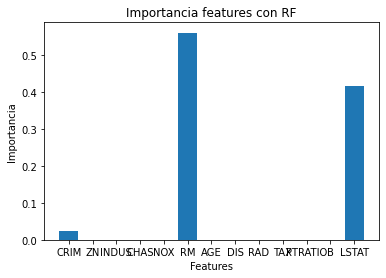

In [23]:
# hacemos un calculo para ver el peso de cada uno de los atributos
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia features con RF')
plt.show

In [24]:
# vemos la importancia cuando dejamos mx_depth = 2 vemos que solamente se aplitiaron los atributos/festures CRIM, RM y LSAT

### Analizando los arboles que esta generando el modelo para entender las clasificaciones o al valor de prediccion que esta emitiendose

In [25]:
rf_model.estimators_
# tenemos los 5 arboles que se entrenaron en el RF

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1791095845, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2135392491, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decre

In [26]:
tree0=rf_model.estimators_[0]
# podemos accede al primero de los arboles y vemos las importancia de los features de este arbol (lo graficamos)

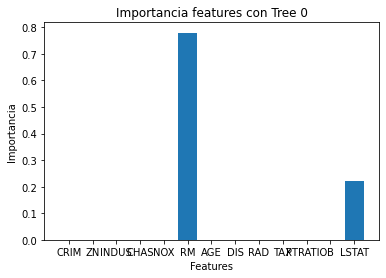

In [27]:
plt.bar(X_train.columns, tree0.feature_importances_)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia features con Tree 0')
plt.show()

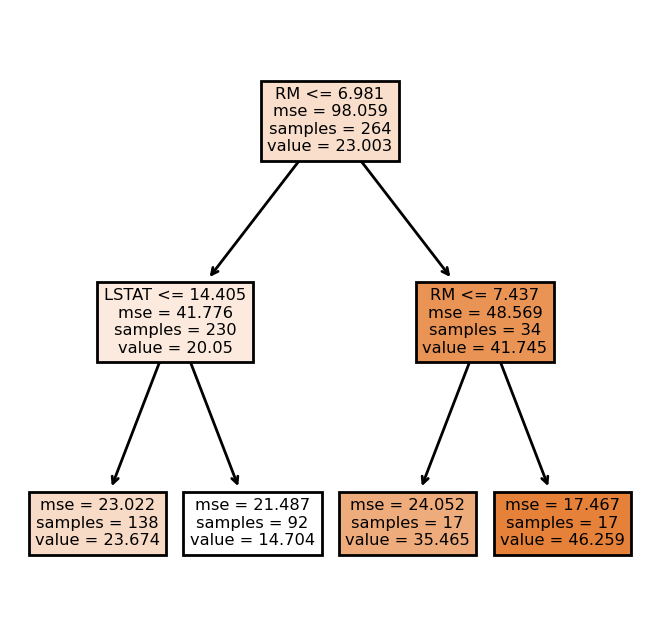

In [28]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize =(4,4), dpi=200)
tree.plot_tree(tree0, feature_names=X_train.columns,filled=True);
# podemos graficar el arbol y vero como realizo el split

## entrenando y prediciendo con un solo arbol

In [29]:
rf_model =RandomForestRegressor(random_state=1, n_estimators=1) # seteamos random_state en 1 para que tengamos siempre los mismos valores

rf_model.fit(X_train, y_train) # con fit lo entrenamos y le pasamos el set de train
preds = rf_model.predict(X_test) # una vez que el modelo rf_model se entreno, le pasamos el X_test

rmse = np.sqrt(mean_squared_error(y_test,preds)) # calculamos el error medio cuadratico de numpy (aunque podemos usar otro) \
# y le pasamos el target real del conjunto de test y las predicciones que nos arrojo el modelo de rf_model 
print("RMSE: %f" % (rmse)) # imprimimos el RMSE

RMSE: 6.027941


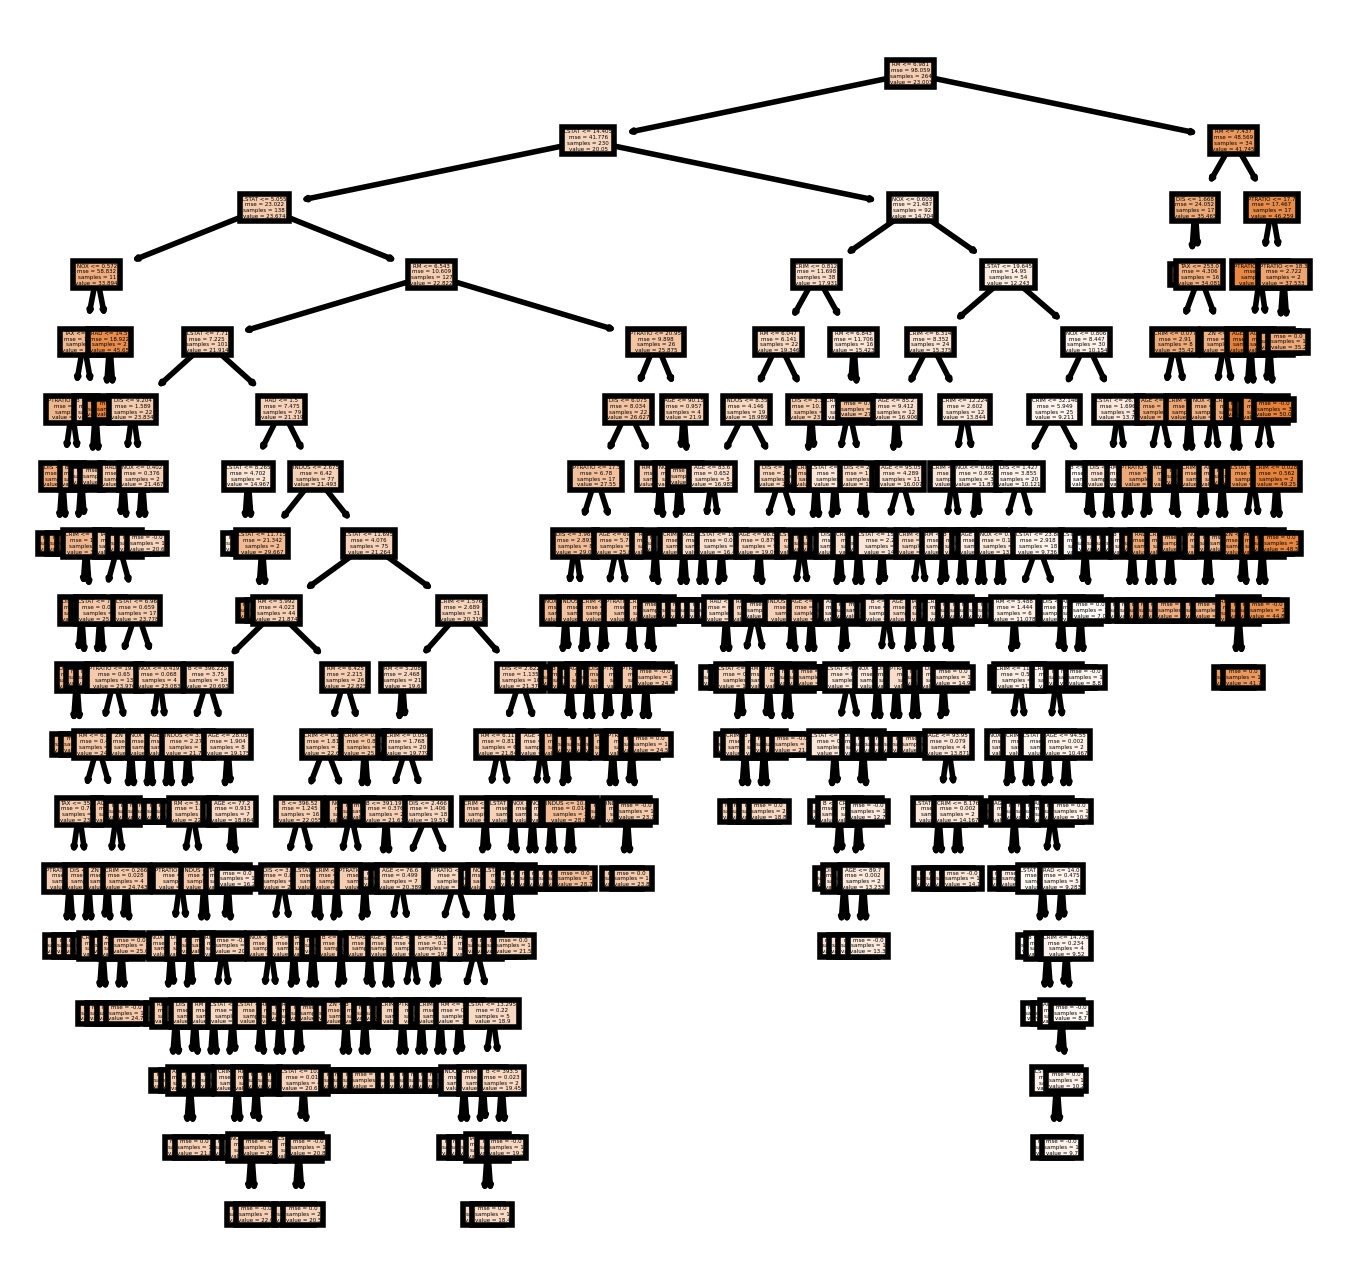

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize =(4,4), dpi=400)
tree.plot_tree(rf_model.estimators_[0], 
               feature_names=X_train.columns,
               filled=True);
# podemos graficar el arbol y veo como realizo el split

## entenando y prediciendo con un colo arbol y 20 datos como minimo split

In [31]:
rf_model=RandomForestRegressor(random_state=1, n_estimators=1,min_samples_split=20)

rf_model.fit(X_train, y_train)
preds= rf_model.predict(X_test)

rmse=np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" %(rmse))

RMSE: 5.662791


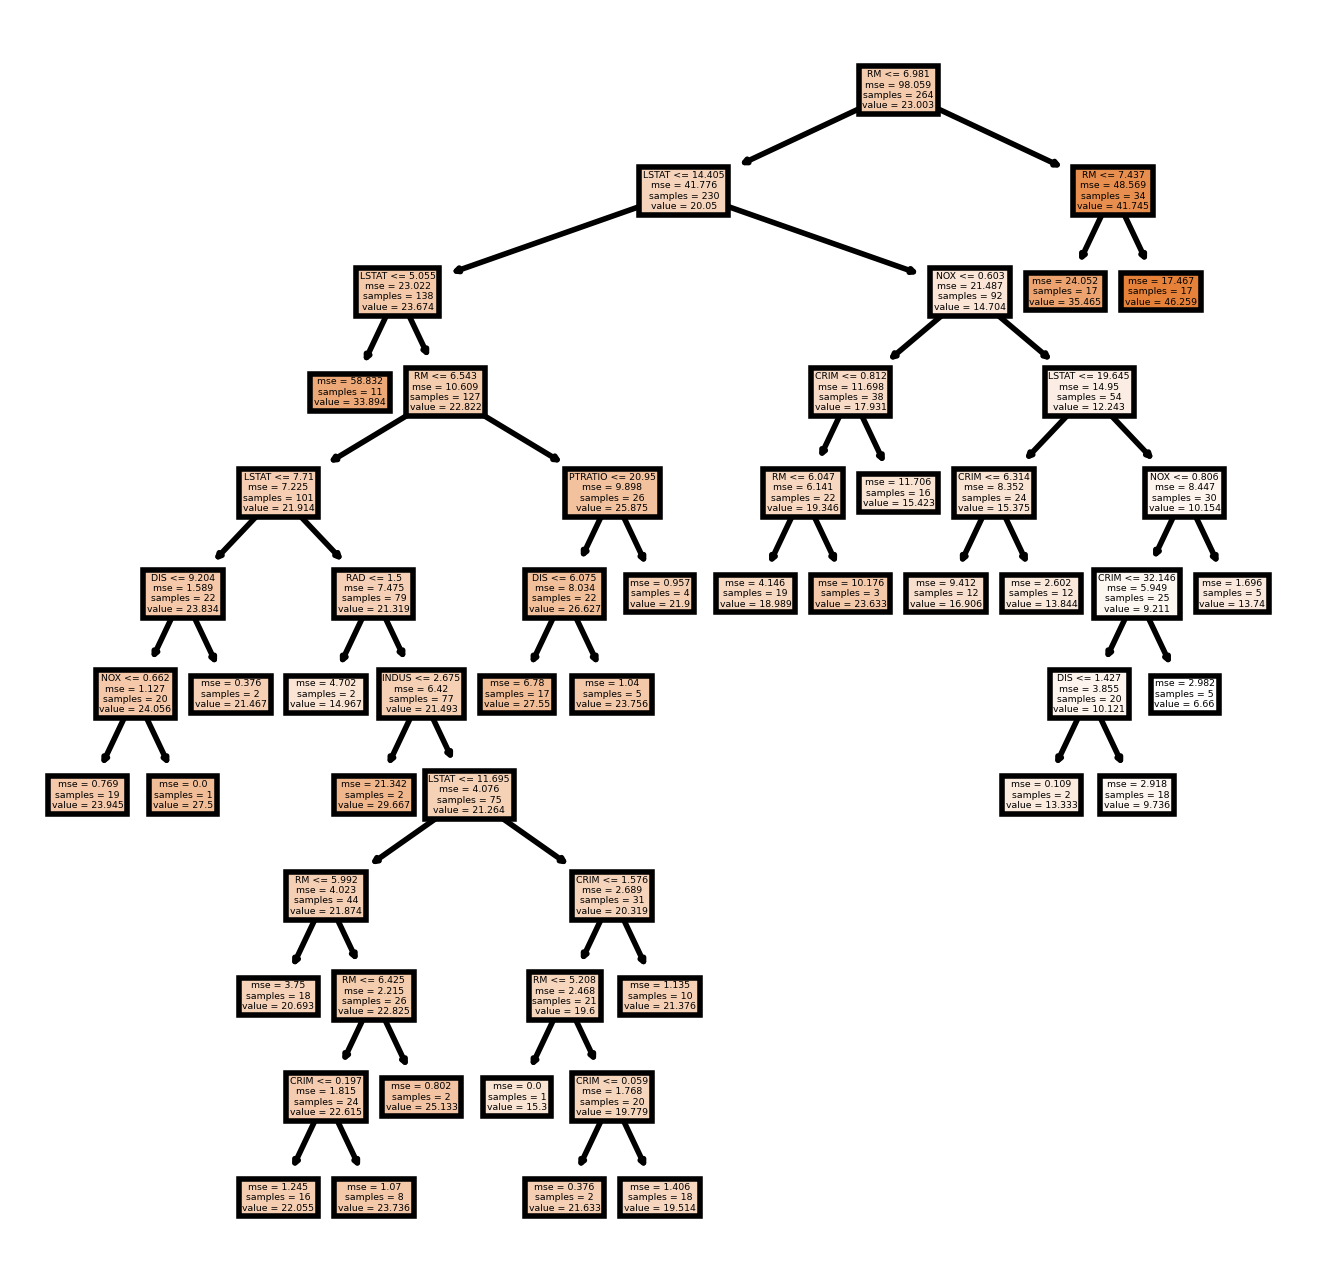

In [32]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize =(4,4), dpi=400)
tree.plot_tree(rf_model.estimators_[0], 
               feature_names=X_train.columns,
               filled=True);
# podemos graficar el arbol y veo como realizo el split